<a href="https://colab.research.google.com/github/swilsonmfc/timeseries/blob/master/Baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baselines

# Install

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Data

In [2]:
!wget -O data.csv https://raw.githubusercontent.com/swilsonmfc/timeseries/master/us_crude_oil.csv

--2022-05-12 12:22:27--  https://raw.githubusercontent.com/swilsonmfc/timeseries/master/us_crude_oil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18705 (18K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  18.27K  --.-KB/s    in 0.001s  

2022-05-12 12:22:27 (27.5 MB/s) - ‘data.csv’ saved [18705/18705]



In [3]:
!head data.csv

U.S. Field Production of Crude Oil
https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=mcrfpus2&f=m
06:28:07 GMT-0400 (Eastern Daylight Time)
Source: U.S. Energy Information Administration
Month,U.S. Field Production of Crude Oil Thousand Barrels per Day
Feb 2022,11312
Jan 2022,11362
Dec 2021,11604
Nov 2021,11769
Oct 2021,11526


In [4]:
df = pd.read_csv('data.csv', skiprows=5, names=['date', 'production'])
df

,date,production
0,Feb 2022,11312
1,Jan 2022,11362
2,Dec 2021,11604
3,Nov 2021,11769
4,Oct 2021,11526
...,...,...
1221,May 1920,1181
1222,Apr 1920,1165
1223,Mar 1920,1167
1224,Feb 1920,1145


# EDA

## Missing

In [5]:
df.isna().sum()

date          0
production    0
dtype: int64

## Order

In [6]:
df = df[::-1].reset_index(drop=True)

In [7]:
df

,date,production
0,Jan 1920,1097
1,Feb 1920,1145
2,Mar 1920,1167
3,Apr 1920,1165
4,May 1920,1181
...,...,...
1221,Oct 2021,11526
1222,Nov 2021,11769
1223,Dec 2021,11604
1224,Jan 2022,11362


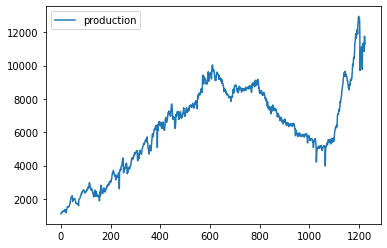

In [8]:
df.plot()

# Train - Test

In [9]:
df = df[600:].reset_index(drop=True)
train = df[:-36]
test = df[-36:]

# Tracking

In [10]:
results_df = pd.DataFrame(columns=['MAE', 'MSE', 'MAPE'])

# Baseline Forecasters

In [11]:
train

,date,production
0,Jan 1970,9478
1,Feb 1970,9570
2,Mar 1970,9508
3,Apr 1970,9591
4,May 1970,9523
...,...,...
585,Oct 2018,11488
586,Nov 2018,11868
587,Dec 2018,11924
588,Jan 2019,11848


In [12]:
test

,date,production
590,Mar 2019,11899
591,Apr 2019,12125
592,May 2019,12141
593,Jun 2019,12179
594,Jul 2019,11896
595,Aug 2019,12475
596,Sep 2019,12572
597,Oct 2019,12771
598,Nov 2019,12966
599,Dec 2019,12910


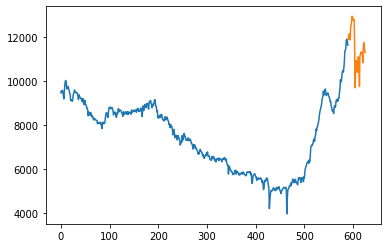

In [13]:
plt.plot(train.production)
plt.plot(test.production)

## Mean / Flat
* Forecast the average of the training data

In [14]:
estimate = train.production.mean()
estimate

7513.418644067797

In [15]:
training_df = train.copy()
training_df['prediction'] = estimate

forecast_df = test.copy()
forecast_df['prediction'] = estimate
forecast_mean_df = forecast_df.copy()

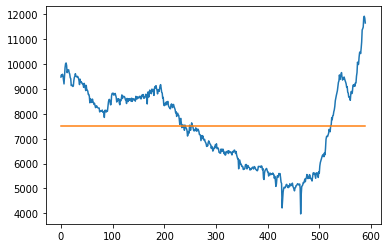

In [16]:
# Training
plt.plot(training_df.production)
plt.plot(training_df.prediction)

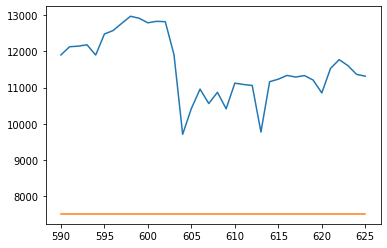

In [17]:
# Test
plt.plot(forecast_df.production)
plt.plot(forecast_df.prediction)

In [18]:
mae = mean_absolute_error(forecast_df.production, forecast_df.prediction)
mse = mean_squared_error(forecast_df.production, forecast_df.prediction)
mape = mean_absolute_percentage_error(forecast_df.production, forecast_df.prediction)
results_df.loc['Flat'] = [mae, mse, mape]

## Trend / Drift
* Draw a line through first and last point of training

In [19]:
trend = (train.iloc[-1].production - train.iloc[0].production) / len(train)
intercept = train.iloc[0].production

In [20]:
training_df = train.copy()
training_df['prediction'] = intercept + trend * training_df.index

forecast_df = test.copy()
forecast_df['prediction'] = intercept + trend * (len(training_df) + forecast_df.index)
forecast_drift_df = forecast_df.copy()

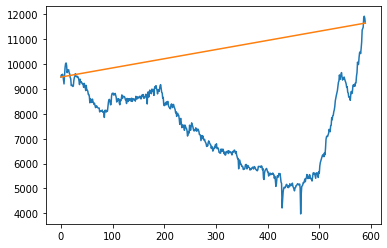

In [21]:
# Training
plt.plot(training_df.production)
plt.plot(training_df.prediction)

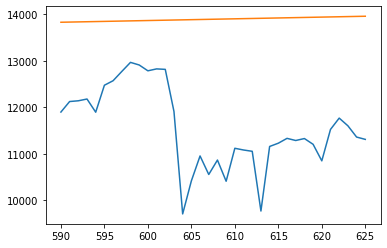

In [22]:
# Test
plt.plot(forecast_df.production)
plt.plot(forecast_df.prediction)

In [23]:
mae = mean_absolute_error(forecast_df.production, forecast_df.prediction)
mse = mean_squared_error(forecast_df.production, forecast_df.prediction)
mape = mean_absolute_percentage_error(forecast_df.production, forecast_df.prediction)
results_df.loc['Drift'] = [mae, mse, mape]

## Naive
* Random Walk

In [24]:
training_df = train.copy()
training_df['prediction'] = training_df.shift(1).production

forecast_df = test.copy()
forecast_df['prediction'] = training_df.tail(1).production.item()
forecast_naive_df = forecast_df.copy()
forecast_df

,date,production,prediction
590,Mar 2019,11899,11653
591,Apr 2019,12125,11653
592,May 2019,12141,11653
593,Jun 2019,12179,11653
594,Jul 2019,11896,11653
595,Aug 2019,12475,11653
596,Sep 2019,12572,11653
597,Oct 2019,12771,11653
598,Nov 2019,12966,11653
599,Dec 2019,12910,11653


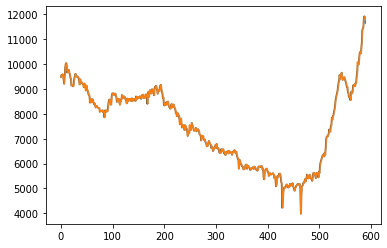

In [25]:
# Training
plt.plot(training_df.production)
plt.plot(training_df.prediction)

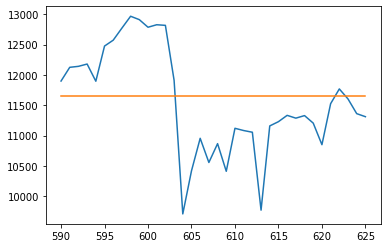

In [26]:
# Test
plt.plot(forecast_df.production)
plt.plot(forecast_df.prediction)

In [27]:
mae = mean_absolute_error(forecast_df.production, forecast_df.prediction)
mse = mean_squared_error(forecast_df.production, forecast_df.prediction)
mape = mean_absolute_percentage_error(forecast_df.production, forecast_df.prediction)
results_df.loc['Naive'] = [mae, mse, mape]

## Seasonal Naive
* If there's strong periodicity, forecast the last value of the same period
* Yearly seasonality, forecast same month last year
* Daily seasonality, forecast same hour yesterday

# Results

In [28]:
results_df

,MAE,MSE,MAPE
Flat,4047.803578,1.711165e+07,0.346510
Drift,2331.290490,6.196043e+06,0.208437
Naive,716.555556,7.353612e+05,0.063027


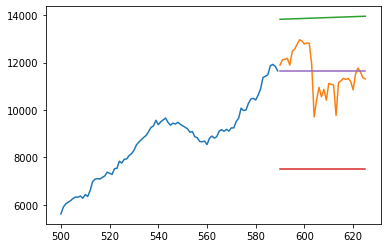

In [31]:
train.production.iloc[500:].plot()
test.production.plot()
forecast_drift_df.prediction.plot()
forecast_mean_df.prediction.plot()
forecast_naive_df.prediction.plot()